# ph Classification

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [2]:
df = pd.read_csv('ph-data.csv')
df = shuffle(df)
df.head()

,blue,green,red,label
478,0,152,240,3
483,47,105,34,8
293,209,143,65,10
198,29,126,240,4
554,65,195,132,5


In [3]:
df.describe()

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 478 to 285
Data columns (total 4 columns):
blue     653 non-null int64
green    653 non-null int64
red      653 non-null int64
label    653 non-null int64
dtypes: int64(4)
memory usage: 25.5 KB


In [5]:
pd.value_counts(df['label']).sort_values()

0     38
13    43
14    44
12    44
11    44
10    44
9     44
8     44
7     44
6     44
5     44
4     44
3     44
2     44
1     44
Name: label, dtype: int64

In [6]:
df.isna().sum()

blue     0
green    0
red      0
label    0
dtype: int64

## Plotting

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

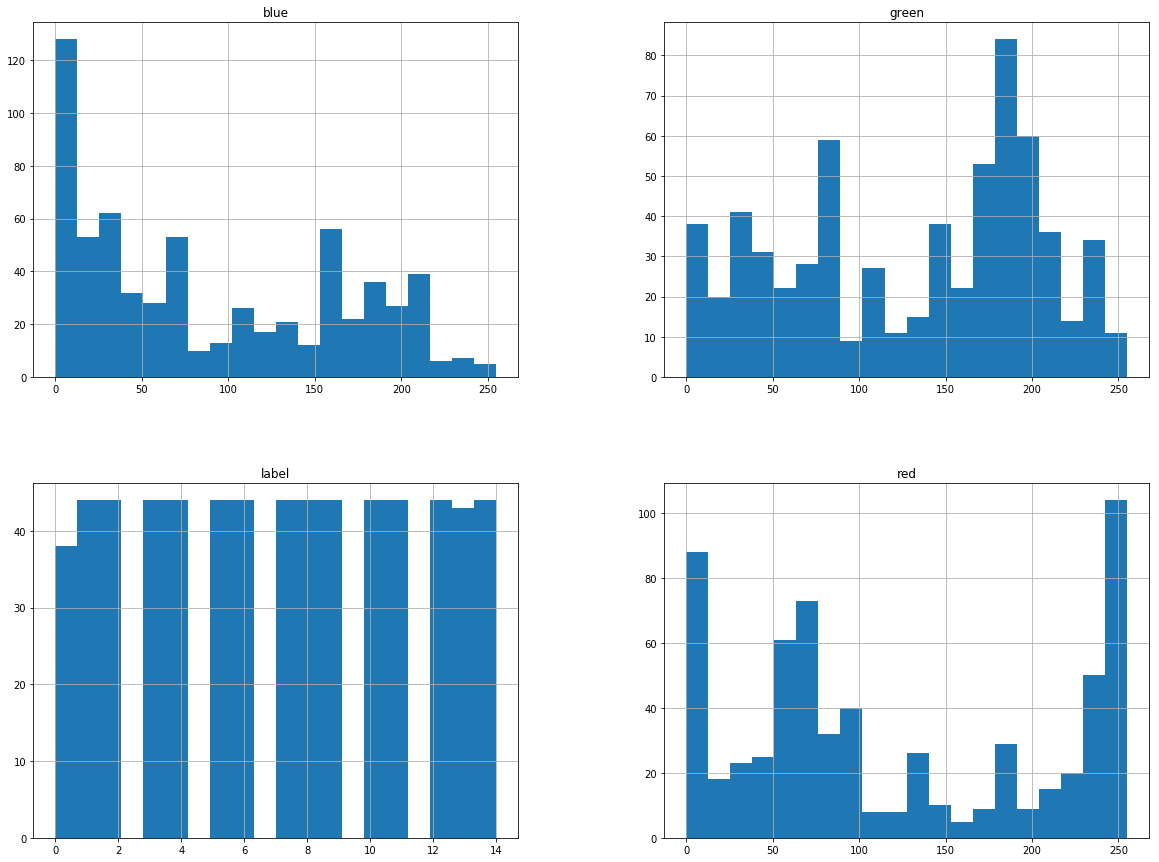

In [8]:
df.hist(bins=20, figsize=(20,15))
plt.show()

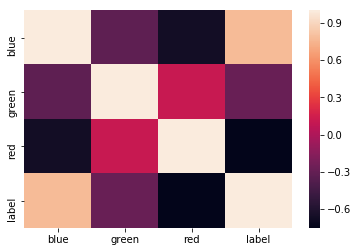

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

In [10]:
corr_matrix['label'].sort_values(ascending=False)

label    1.000000
blue     0.777602
green   -0.281357
red     -0.751137
Name: label, dtype: float64

## Split data

In [11]:
X = df.drop('label', axis=1)
y = df['label']
X.shape, y.shape

((653, 3), (653,))

In [12]:
from sklearn.preprocessing import StandardScaler
after_scalar_data = StandardScaler().fit_transform(X)
after_scalar_data

array([[-1.19185852,  0.30242416,  1.33327043],
       [-0.56450109, -0.34646425, -0.96808038],
       [ 1.59787985,  0.17816893, -0.6217606 ],
       ...,
       [-1.19185852,  1.44833347,  1.45615809],
       [ 0.99721848, -0.71922993, -0.34247045],
       [-1.17851049,  0.97892484,  1.42264328]])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((522, 3), (131, 3), (522,), (131,))

## Choose Model

### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import classification_report
log_reg_predict = log_reg.predict(x_test)
x = [i for i in range(15)]
log_reg_result = classification_report(y_test, log_reg_predict,labels=x)
print(log_reg_result)

             precision    recall  f1-score   support

          0       1.00      0.87      0.93        15
          1       0.71      0.62      0.67         8
          2       0.00      0.00      0.00         5
          3       0.26      0.71      0.38         7
          4       0.00      0.00      0.00        12
          5       0.43      0.67      0.52         9
          6       0.50      0.30      0.37        10
          7       0.55      0.60      0.57        10
          8       0.40      0.20      0.27        10
          9       0.36      0.83      0.50         6
         10       0.60      0.43      0.50         7
         11       0.71      0.62      0.67         8
         12       1.00      0.40      0.57        10
         13       0.50      0.75      0.60         8
         14       0.56      0.83      0.67         6

avg / total       0.54      0.52      0.50       131



C:\Users\asus\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### DecisionTreeClassfier

**without gridsearch**

In [16]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_class = DecisionTreeClassifier(max_depth=10)
dec_tree_class.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
tree_predict = dec_tree_class.predict(x_test)
tree_result = classification_report(y_test, tree_predict, labels=x)
print(tree_result)

             precision    recall  f1-score   support

          0       1.00      0.80      0.89        15
          1       0.78      0.88      0.82         8
          2       0.80      0.80      0.80         5
          3       0.50      0.57      0.53         7
          4       0.60      0.75      0.67        12
          5       0.70      0.78      0.74         9
          6       0.86      0.60      0.71        10
          7       0.89      0.80      0.84        10
          8       0.67      0.60      0.63        10
          9       0.40      0.33      0.36         6
         10       0.56      0.71      0.63         7
         11       0.56      0.62      0.59         8
         12       1.00      0.90      0.95        10
         13       1.00      0.62      0.77         8
         14       0.60      1.00      0.75         6

avg / total       0.75      0.73      0.73       131



**with gridsearch**

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid_tree = [
    {'max_depth':[None,1,2,5,10],
     'criterion':['gini','entropy']},
    {'splitter':['best','random']}
]

In [20]:
tree_grid = GridSearchCV(dec_tree_class, param_grid_tree, scoring='accuracy')
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [None, 1, 2, 5, 10], 'criterion': ['gini', 'entropy']}, {'splitter': ['best', 'random']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [22]:
tree_predict_gs = dec_tree_class.predict(x_test)
tree_result_gs = classification_report(y_test, tree_predict_gs, labels=x)
print(tree_result_gs)

             precision    recall  f1-score   support

          0       1.00      0.80      0.89        15
          1       0.78      0.88      0.82         8
          2       0.80      0.80      0.80         5
          3       0.50      0.57      0.53         7
          4       0.60      0.75      0.67        12
          5       0.70      0.78      0.74         9
          6       0.86      0.60      0.71        10
          7       0.89      0.80      0.84        10
          8       0.67      0.60      0.63        10
          9       0.40      0.33      0.36         6
         10       0.56      0.71      0.63         7
         11       0.56      0.62      0.59         8
         12       1.00      0.90      0.95        10
         13       1.00      0.62      0.77         8
         14       0.60      1.00      0.75         6

avg / total       0.75      0.73      0.73       131



In [25]:
from sklearn.externals import joblib
joblib.dump(tree_grid.best_estimator_, 'tree-75%.pkl')

['C:\\Users\\asus\\Desktop\\ph-recognition\\ph-flask\\ml-models\\tree-75%.pkl']

### cross_val_score & cross_val_predict

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(dec_tree_class, x_train,y_train, cv=4, scoring='accuracy')

array([0.71323529, 0.73134328, 0.6953125 , 0.65322581])

In [27]:
from sklearn.model_selection import cross_val_predict
y_pred_tree = cross_val_predict(dec_tree_class, x_train, y_train, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_tree)

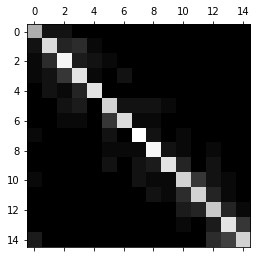

In [29]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

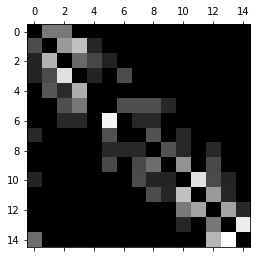

In [30]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

### GradientBoostingClassifier

**without randomgridsearch**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [32]:
grad_predict = grad_boost.predict(x_test)
grad_result = classification_report(y_test, grad_predict,labels=x)
print(grad_result)

             precision    recall  f1-score   support

          0       1.00      0.80      0.89        15
          1       0.73      1.00      0.84         8
          2       0.57      0.80      0.67         5
          3       0.40      0.29      0.33         7
          4       0.62      0.67      0.64        12
          5       0.67      0.67      0.67         9
          6       0.75      0.60      0.67        10
          7       0.88      0.70      0.78        10
          8       1.00      0.60      0.75        10
          9       0.50      1.00      0.67         6
         10       0.43      0.43      0.43         7
         11       0.62      0.62      0.62         8
         12       1.00      0.90      0.95        10
         13       0.86      0.75      0.80         8
         14       0.67      1.00      0.80         6

avg / total       0.75      0.72      0.72       131



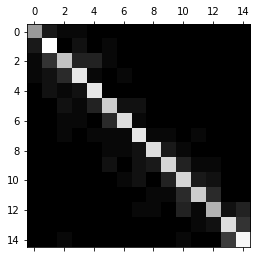

In [33]:
y_pred_grad = cross_val_predict(grad_boost, x_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_pred_grad)
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

***
## Enseble methods

***

### VotingClassifier

**voting="hard"**

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm_clf = SVC(probability=True)
rnd_clf = RandomForestClassifier()

In [35]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('svc', svm_clf), ('rf', rnd_clf), ('dec', dec_tree_class)], voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, class_we...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [36]:
voting_predict = voting_clf.predict(x_test)
print(classification_report(y_test, voting_predict, labels=x))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       0.70      0.88      0.78         8
          2       0.17      0.80      0.29         5
          3       0.50      0.43      0.46         7
          4       0.73      0.67      0.70        12
          5       0.70      0.78      0.74         9
          6       0.83      0.50      0.62        10
          7       1.00      0.70      0.82        10
          8       0.67      0.60      0.63        10
          9       1.00      0.33      0.50         6
         10       0.80      0.57      0.67         7
         11       0.83      0.62      0.71         8
         12       1.00      0.90      0.95        10
         13       1.00      0.62      0.77         8
         14       0.86      1.00      0.92         6

avg / total       0.80      0.69      0.72       131



C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
# save model with 80% precision
from sklearn.externals import joblib
# joblib.dump(voting_clf, 'voting_clf-80%.pkl')

**voting="soft"**

In [38]:
voting_clf = VotingClassifier(estimators=[('svc', svm_clf), ('rf', rnd_clf), ('dec', dec_tree_class)], voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, class_we...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [39]:
voting_predict = voting_clf.predict(x_test)
print(classification_report(y_test, voting_predict, labels=x))

             precision    recall  f1-score   support

          0       1.00      0.87      0.93        15
          1       0.78      0.88      0.82         8
          2       0.80      0.80      0.80         5
          3       0.43      0.43      0.43         7
          4       0.58      0.58      0.58        12
          5       0.50      0.56      0.53         9
          6       0.75      0.60      0.67        10
          7       0.89      0.80      0.84        10
          8       1.00      0.60      0.75        10
          9       0.50      0.83      0.62         6
         10       0.71      0.71      0.71         7
         11       0.60      0.75      0.67         8
         12       1.00      0.90      0.95        10
         13       0.83      0.62      0.71         8
         14       0.60      1.00      0.75         6

avg / total       0.76      0.73      0.73       131



C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Bagging and Pasting

In [41]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [42]:
bagging_predict = bag_clf.predict(x_test)
print(classification_report(y_test, bagging_predict, labels=x))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       0.67      1.00      0.80         8
          2       0.50      0.80      0.62         5
          3       0.22      0.29      0.25         7
          4       0.67      0.50      0.57        12
          5       0.78      0.78      0.78         9
          6       0.62      0.50      0.56        10
          7       0.78      0.70      0.74        10
          8       0.88      0.70      0.78        10
          9       0.86      1.00      0.92         6
         10       0.71      0.71      0.71         7
         11       1.00      0.62      0.77         8
         12       0.89      0.80      0.84        10
         13       1.00      0.75      0.86         8
         14       0.60      1.00      0.75         6

avg / total       0.75      0.73      0.73       131



In [43]:
bag_clf.oob_score_

0.7222222222222222

### Random Forests

In [44]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred_rf = rnd_clf.predict(x_test)
np.sum(y_test == y_pred_rf) / len(y_test)

0.7175572519083969

### Extra Trees

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
extra.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
y_pred_extra = extra.predict(x_test)
np.sum(y_test == y_pred_extra) / len(y_test)

0.6793893129770993

In [48]:
# comparison
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_extra)), print(accuracy_score(y_test, y_pred_rf))

0.6793893129770993
0.7175572519083969


(None, None)

### Feature Importance

In [49]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
for name, score in zip(df.columns, rnd_clf.feature_importances_):
    print(name, score)

blue 0.2843213694843639
green 0.38299359515478504
red 0.33268503536085087


### Boosting

**AdaBoost**

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200,
                            algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [51]:
print(accuracy_score(y_test, ada_clf.predict(x_test)))

0.7251908396946565


***
***

### XGBoost 

In [52]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [53]:
if xgboost is not None:  # not shown in the book
    xgb_clf = xgboost.XGBClassifier()
    xgb_clf.fit(x_train, y_train)
    y_pred = xgb_clf.predict(x_test)
    print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.73      0.85        15
          1       0.62      1.00      0.76         8
          2       0.44      0.80      0.57         5
          3       0.50      0.29      0.36         7
          4       0.73      0.67      0.70        12
          5       0.64      0.78      0.70         9
          6       0.75      0.60      0.67        10
          7       0.88      0.70      0.78        10
          8       1.00      0.70      0.82        10
          9       0.55      1.00      0.71         6
         10       0.67      0.57      0.62         7
         11       0.71      0.62      0.67         8
         12       0.89      0.80      0.84        10
         13       0.86      0.75      0.80         8
         14       0.67      1.00      0.80         6

avg / total       0.76      0.73      0.73       131



C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [54]:
if xgboost is not None:
    xgb_clf.fit(x_train, y_train,
                eval_set=[(x_test, y_test)], early_stopping_rounds=2)
    y_pred = xgb_clf.predict(x_test)
    print(classification_report(y_test, y_pred))

[0]	validation_0-merror:0.335878
Will train until validation_0-merror hasn't improved in 2 rounds.
[1]	validation_0-merror:0.312977
[2]	validation_0-merror:0.320611
[3]	validation_0-merror:0.320611
Stopping. Best iteration:
[1]	validation_0-merror:0.312977

             precision    recall  f1-score   support

          0       1.00      0.80      0.89        15
          1       0.67      1.00      0.80         8
          2       0.44      0.80      0.57         5
          3       0.33      0.14      0.20         7
          4       0.69      0.75      0.72        12
          5       0.64      0.78      0.70         9
          6       0.67      0.60      0.63        10
          7       0.88      0.70      0.78        10
          8       1.00      0.60      0.75        10
          9       0.56      0.83      0.67         6
         10       0.67      0.57      0.62         7
         11       0.50      0.62      0.56         8
         12       1.00      0.50      0.67        10

C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


*optimizing xgboost*

In [55]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgboost.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
optimized_GBM.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [56]:
optimized_GBM.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8)

In [57]:
y_pred_opt = optimized_GBM.predict(x_test)
print(classification_report(y_test, y_pred_opt))

             precision    recall  f1-score   support

          0       1.00      0.80      0.89        15
          1       0.78      0.88      0.82         8
          2       0.57      0.80      0.67         5
          3       0.29      0.29      0.29         7
          4       0.62      0.67      0.64        12
          5       0.60      0.67      0.63         9
          6       0.67      0.60      0.63        10
          7       1.00      0.60      0.75        10
          8       0.89      0.80      0.84        10
          9       0.60      1.00      0.75         6
         10       0.67      0.57      0.62         7
         11       0.62      0.62      0.62         8
         12       1.00      0.80      0.89        10
         13       0.75      0.75      0.75         8
         14       0.67      1.00      0.80         6

avg / total       0.75      0.72      0.72       131



C:\Users\asus\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
